
# Draft Analysis: Video Performance Evaluation

## Zielsetzung
Diese Analyse untersucht die Leistung von Videos eines TV-Channels. Ziel ist es:
- Erfolgsfaktoren zu identifizieren,
- die Performance von Videos zu bewerten und
- ein Modell zur Vorhersage der Aufrufe zu entwickeln.

## Verwendete Daten
Die analysierten Daten enthalten Informationen zu:
- **Videodetails**: Titel, Veröffentlichungsdatum, Länge, Thema.
- **Engagement-Daten**: Aufrufe, Likes, Kommentare, Wiedergabezeit.
- **Zusätzliche Variablen**: SEO-Bewertung und Thema (kategorisch).

## Die Daten enthalten verschiedene Metriken für jedes Video wie:

video_id (eindeutige ID)
title (Videotitel)
publish_date (Veröffentlichungsdatum)
video_length_seconds (Länge in Sekunden)
Thema (Live oder Sonstiges)
Performance-Metriken:
wiedergabezeit_minuten (Gesamtwiedergabezeit)
durchschnittliche_wiedergabedauer
aufrufe (Views)
likes/dislikes
kommentare
geteilte_inhalte
Zielgruppen-Demografien:
Aufschlüsselung nach Geschlecht und Altersgruppen (z.B. audience_female_age18-24)
Engagement-Metriken:
Neue Zuschauer
Klicks auf verschiedene Elemente
Impressionen
Klickrate
Qualitätsbewertungen:
Bewertung_Titel
Gestaltung_Thumbnail

## Hier ein HTML-Code mit einer Tabelle der Metriken


In [ ]:
import pandas as pd
from IPython.display import HTML

# Variablen-Definitionen erstellen
variables_data = {
    'Variable': [
        # Identifikation & Basisdaten
        'video_id', 'title', 'publish_date', 'video_length_seconds',
        
        # Hauptmetriken (Zielvariablen)
        'aufrufe', 'likes', 'dislikes', 'kommentare', 'geteilte_inhalte',
        'wiedergabezeit_minuten', 'durchschnittliche_wiedergabedauer',
        'durchschnittliche_wiedergabedauer_prozent',
        
        # Abonnenten-Metriken
        'gewonnene_abonnenten', 'verlorene_abonnenten',
        
        # Demografische Daten (zusammengefasst)
        'audience_demographics',
        
        # Engagement & Reichweite
        'Neue Zuschauer', 
        'Klicks auf Abspannelement',
        'Klicks auf Infokartenteaser', 
        'Klicks auf Infokarte',
        'Im Feed angezeigt', 
        'Impressionen', 
        'Klickrate der Impressionen (%)',
        'Mag ich nicht-Bewertungen',
        
        # Content-Qualität
        'Thema', 
        'Bewertung_Titel', 
        'Gestaltung_Thumbnail'
    ],
    
    'Beschreibung': [
        # Identifikation & Basisdaten
        'Eindeutige Video-ID', 'Videotitel', 'Veröffentlichungsdatum', 'Videolänge in Sekunden',
        
        # Hauptmetriken
        'Gesamtanzahl der Views', 'Positive Bewertungen', 'Negative Bewertungen', 
        'Anzahl Kommentare', 'Häufigkeit des Teilens',
        'Gesamte Wiedergabezeit', 'Durchschnittliche Wiedergabedauer pro View',
        'Durchschnittliche Wiedergabedauer in Prozent',
        
        # Abonnenten
        'Neu gewonnene Abonnenten', 'Verlorene Abonnenten',
        
        # Demografische Daten
        'Zuschauerverteilung nach Alter (13-65+) und Geschlecht (m/w)',
        
        # Engagement & Reichweite
        'Anzahl neuer Zuschauer',
        'Interaktionen mit Abspann',
        'Interaktionen mit Infokarten-Teaser', 
        'Interaktionen mit Infokarten',
        'Anzahl Feed-Anzeigen', 
        'Gesamtanzahl Impressionen', 
        'Click-Through-Rate',
        'Anzahl negativer Bewertungen',
        
        # Content-Qualität
        'Thematische Kategorie', 
        'SEO-Score des Titels (1-10)', 
        'Thumbnail-Bewertung (1-10)'
    ],
    
    'Datentyp': [
        # Identifikation & Basisdaten
        'string', 'string', 'datetime', 'integer',
        
        # Hauptmetriken
        'integer', 'integer', 'integer', 'integer', 'integer',
        'integer', 'float', 'float',
        
        # Abonnenten
        'integer', 'integer',
        
        # Demografische Daten
        'float[]',
        
        # Engagement & Reichweite
        'integer', 'integer', 'integer', 'integer',
        'integer', 'integer', 'float', 'integer',
        
        # Content-Qualität
        'string', 'integer', 'integer'
    ],
    
    'Rolle': [
        # Identifikation & Basisdaten
        'ID', 'Prädiktor', 'Prädiktor', 'Prädiktor',
        
        # Hauptmetriken
        'Zielvariable', 'Zielvariable', 'Zielvariable', 'Zielvariable', 'Zielvariable',
        'Zielvariable', 'Zielvariable', 'Zielvariable',
        
        # Abonnenten
        'Zielvariable', 'Zielvariable',
        
        # Demografische Daten
        'Demographic',
        
        # Engagement & Reichweite
        'Zielvariable', 'Engagement', 'Engagement', 'Engagement',
        'Reichweite', 'Reichweite', 'Performance', 'Zielvariable',
        
        # Content-Qualität
        'Prädiktor', 'Prädiktor', 'Prädiktor'
    ]
}

# HTML-Tabelle erstellen
html_content = """
<style>
    .youtube-vars {
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        width: 100%;
        margin: 20px 0;
    }
    .youtube-vars th {
        background-color: #f8f9fa;
        color: #202124;
        font-weight: bold;
        text-align: left;
        padding: 12px;
        border: 1px solid #e0e0e0;
    }
    .youtube-vars td {
        padding: 10px;
        border: 1px solid #e0e0e0;
        vertical-align: top;
    }
    .youtube-vars tr:nth-child(even) {
        background-color: #f8f9fa;
    }
    .role-tag {
        padding: 4px 8px;
        border-radius: 12px;
        font-size: 12px;
        font-weight: bold;
        display: inline-block;
    }
    .role-description {
        font-size: 13px;
        margin-top: 4px;
        color: #5f6368;
    }
</style>

<div class="role-description">
    <strong>Hinweis zu demographischen Daten:</strong><br>
    Die demographischen Daten umfassen 12 Altersgruppen (13-17, 18-24, 25-34, 35-44, 45-54, 55-64, 65+) 
    jeweils für männliche und weibliche Zuschauer. Diese wurden zur besseren Übersicht zusammengefasst dargestellt.
</div>

<table class="youtube-vars">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Beschreibung</th>
            <th>Datentyp</th>
            <th>Rolle</th>
        </tr>
    </thead>
    <tbody>
"""

# Zeilen hinzufügen
for _, row in pd.DataFrame(variables_data).iterrows():
    role_class = {
        'Zielvariable': 'background-color: #e6f4ea; color: #137333;',
        'Prädiktor': 'background-color: #e8f0fe; color: #1967d2;',
        'Demographic': 'background-color: #fef7e0; color: #b06000;',
        'Engagement': 'background-color: #f3e8fd; color: #9334e6;',
        'Reichweite': 'background-color: #fce8e6; color: #c5221f;',
        'Performance': 'background-color: #e6f4ea; color: #137333;',
        'ID': 'background-color: #f1f3f4; color: #3c4043;'
    }.get(row['Rolle'], '')
    
    html_content += f"""
        <tr>
            <td>{row['Variable']}</td>
            <td>{row['Beschreibung']}</td>
            <td>{row['Datentyp']}</td>
            <td><span class="role-tag" style="{role_class}">{row['Rolle']}</span></td>
        </tr>
    """

html_content += """
    </tbody>
</table>
"""

# HTML anzeigen
HTML(html_content)


## Datenaufbereitung

In diesem Abschnitt werden die Daten geladen und vorbereitet. Die Datenaufbereitung hat sich als extrem schwierig erwiesen. Die API von youtube sind sehr komplex und unübersichtlich. Teilweise bekommt man Daten nur auf dem Weg über youtbe Analytics im Youtube Studio. So zum Beispiel die Klickrate der Impressions. Durch diverse Konvertierungsprobleme hat sich die AUfbereitung üebr Tage hingezogen. 

 Dazu gehören:
1. Überblick über die Datenstruktur.
2. Identifikation und Umgang mit fehlenden Werten.
3. Bereinigung und Transformation der Daten.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_check_data(file_path):
    """Daten laden und grundlegende Prüfungen durchführen"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Die Datei {file_path} wurde nicht gefunden")
        
    try:
        data = pd.read_csv(file_path, 
                          delimiter=';',
                          encoding='utf-8',
                          na_values=['', 'NA', 'null'])
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Datei: {e}")
        return None

def analyze_missing_values(df):
    """Analyse fehlender Werte"""
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Fehlende Werte': missing,
        'Prozent': missing_percent
    })
    missing_info = missing_info[missing_info['Fehlende Werte'] > 0].sort_values('Fehlende Werte', ascending=False)
    
    print("\nAnalyse fehlender Werte:")
    print("-" * 50)
    if len(missing_info) > 0:
        print(missing_info.to_string(float_format=lambda x: '{:.2f}'.format(x) if isinstance(x, float) else str(x)))
    else:
        print("Keine fehlenden Werte gefunden")

def get_data_info(df):
    """Grundlegende Datenanalyse"""
    print("\nGrundlegende Statistiken:")
    print("-" * 50)
    
    print(f"Datensatzgröße: {df.shape[0]:,} Zeilen x {df.shape[1]} Spalten")
    memory_usage = df.memory_usage(deep=True).sum()
    print(f"Speicherverbrauch: {memory_usage / 1024 / 1024:.2f} MB")
    
    print("\nSpalteninformationen:")
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")
    
    return df.describe()

# Hauptprogramm
file_path = 'updated_allewerte.csv'
data = load_and_check_data(file_path)

if data is not None:
    print(get_data_info(data))
    analyze_missing_values(data)



## Deskriptive Analyse

Die deskriptive Analyse liefert erste Einblicke in die Verteilung und Durchschnittswerte der Erfolgskennzahlen.
Es wird untersucht, wie verschiedene Themen mit den Kennzahlen korrelieren.



Deskriptive Statistiken der Erfolgskennzahlen:
--------------------------------------------------------------------------------
             aufrufe     likes  wiedergabezeit_minuten  kommentare
count        2592.00   2592.00                 2592.00     2592.00
mean        34471.35    439.31                71347.27      138.78
std         96422.32   2090.09               348132.24      446.87
min           178.00      1.00                  206.00        0.00
25%          2913.25     37.00                 2684.75        0.00
50%          8828.50     90.50                 9299.50       16.00
75%         29431.00    279.00                41808.00      108.00
max       1778951.00  54793.00             13595505.00    14472.00
skew           10.34     16.99                   26.10       15.80
kurtosis      152.46    360.30                  925.48      431.29
cv              2.80      4.76                    4.88        3.22


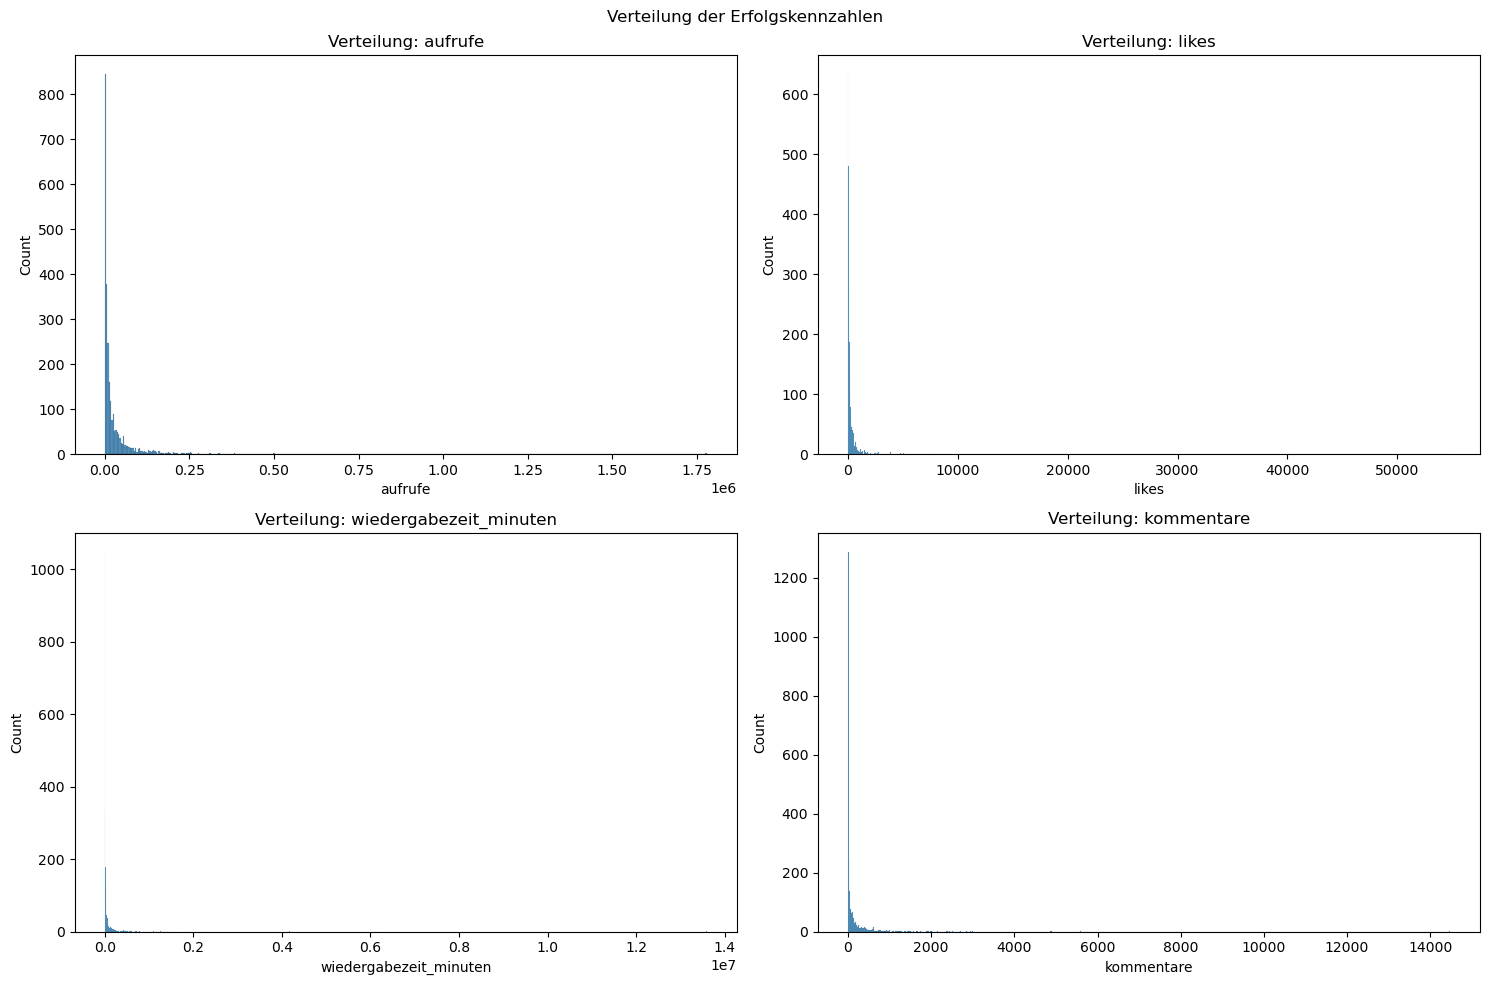


Performance nach Thema:
--------------------------------------------------------------------------------
             Aufrufe_Mean  Aufrufe_Median  Aufrufe_Sum  Aufrufe_Count  \
Thema                                                                   
Sonstiges        31188.37          7291.0     48809793           1565   
Krieg            62749.70         24697.0     24095884            384   
Politik          36818.46         15313.0      8284153            225   
Live             17144.87          4554.0      4749130            277   
Bilder           40681.93          9091.0      2359552             58   
Wirtschaft       11977.07          3336.0       862349             72   
Nachrichten      17169.73          5996.0       188867             11   

             Likes_Mean  Likes_Median  Likes_Sum  Wiedergabezeit_Minuten_Mean  \
Thema                                                                           
Sonstiges        410.14          83.0     641872                     55692

C:\Users\laukat\AppData\Local\Temp\ipykernel_18100\1135676729.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


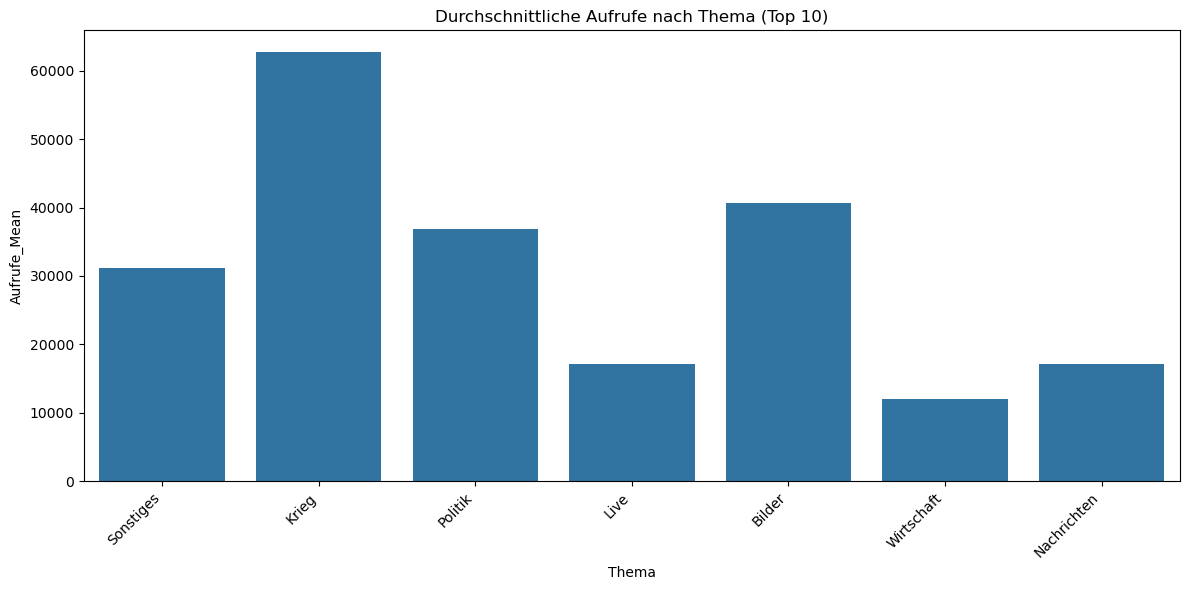


Wichtige Erkenntnisse:
--------------------------------------------------------------------------------
Durchschnittliche Aufrufe pro Video: 34,471
Median der Aufrufe: 8,828
Erfolgreichstes Thema: Sonstiges (Ø 31,188 Aufrufe)
Höchste Engagement-Rate: 1.64% (Politik)


In [7]:
# Verbesserte deskriptive Analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_performance_metrics(data):
    """Analysiert die wichtigsten Performance-Metriken"""
    
    # Erfolgskennzahlen definieren
    metrics = ['aufrufe', 'likes', 'wiedergabezeit_minuten', 'kommentare']
    
    # Deskriptive Statistiken berechnen
    stats = data[metrics].describe()
    
    # Zusätzliche Statistiken hinzufügen
    stats.loc['skew'] = data[metrics].skew()
    stats.loc['kurtosis'] = data[metrics].kurtosis()
    stats.loc['cv'] = data[metrics].std() / data[metrics].mean()  # Variationskoeffizient
    
    print("\nDeskriptive Statistiken der Erfolgskennzahlen:")
    print("-" * 80)
    print(stats.round(2))
    
    # Visualisierung der Verteilungen
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Verteilung der Erfolgskennzahlen')
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx//2, idx%2]
        sns.histplot(data=data, x=metric, ax=ax)
        ax.set_title(f'Verteilung: {metric}')
    
    plt.tight_layout()
    plt.show()
    
    return stats

def analyze_performance_by_topic(data):
    """Analysiert die Performance nach Thema"""
    
    # Aggregationen definieren
    aggs = {
        'aufrufe': ['mean', 'median', 'sum', 'count'],
        'likes': ['mean', 'median', 'sum'],
        'wiedergabezeit_minuten': ['mean', 'median', 'sum'],
        'kommentare': ['mean', 'median', 'sum']
    }
    
    # Gruppierung und Aggregation
    performance = data.groupby('Thema').agg(aggs).round(2)
    
    # Spalten umbenennen für bessere Lesbarkeit
    performance.columns = [
        f'{col[0]}_{col[1]}'.title()
        for col in performance.columns
    ]
    
    # Engagement-Rate berechnen (Likes/Aufrufe)
    performance['Engagement_Rate'] = (
        performance['Likes_Sum'] / performance['Aufrufe_Sum'] * 100
    ).round(2)
    
    # Nach Aufrufen sortieren
    performance = performance.sort_values('Aufrufe_Sum', ascending=False)
    
    print("\nPerformance nach Thema:")
    print("-" * 80)
    print(performance)
    
    # Visualisierung der Top-Themen
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=performance.reset_index().head(10),
        x='Thema',
        y='Aufrufe_Mean',
        ci=None
    )
    plt.xticks(rotation=45, ha='right')
    plt.title('Durchschnittliche Aufrufe nach Thema (Top 10)')
    plt.tight_layout()
    plt.show()
    
    return performance

def print_key_insights(stats, performance):
    """Druckt wichtige Erkenntnisse aus der Analyse"""
    
    print("\nWichtige Erkenntnisse:")
    print("-" * 80)
    print(f"Durchschnittliche Aufrufe pro Video: {stats.loc['mean', 'aufrufe']:,.0f}")
    print(f"Median der Aufrufe: {stats.loc['50%', 'aufrufe']:,.0f}")
    print(f"Erfolgreichstes Thema: {performance.index[0]} "
          f"(Ø {performance.iloc[0]['Aufrufe_Mean']:,.0f} Aufrufe)")
    print(f"Höchste Engagement-Rate: {performance['Engagement_Rate'].max():.2f}% "
          f"({performance['Engagement_Rate'].idxmax()})")

# Hauptanalyse durchführen
stats = analyze_performance_metrics(data)
performance = analyze_performance_by_topic(data)
print_key_insights(stats, performance)


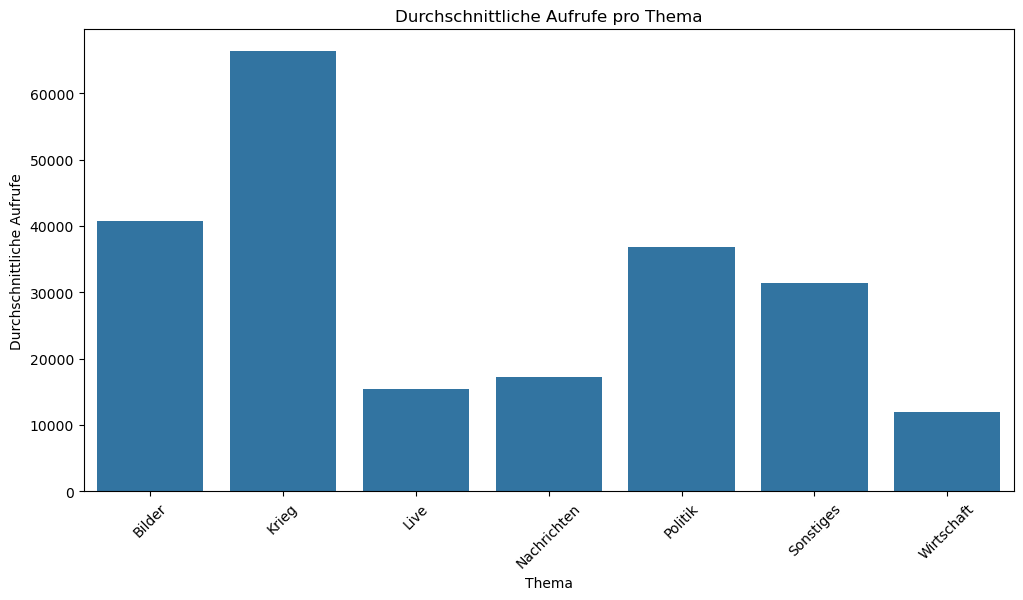

In [5]:

# Visualisierung der Performance nach Thema
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_topic, x='Thema', y='Aufrufe_Mean')
plt.title("Durchschnittliche Aufrufe pro Thema")
plt.ylabel("Durchschnittliche Aufrufe")
plt.xlabel("Thema")
plt.xticks(rotation=45)
plt.show()



## Korrelationen

In diesem Abschnitt werden die Zusammenhänge zwischen verschiedenen Variablen untersucht, um herauszufinden, 
welche Faktoren am stärksten mit den Videoaufrufen korrelieren. Hier ist noch einiges an Arbeit erforderlich. Es müssen noch einige Prädiktoren ausgewertet und bestimmt werden. 


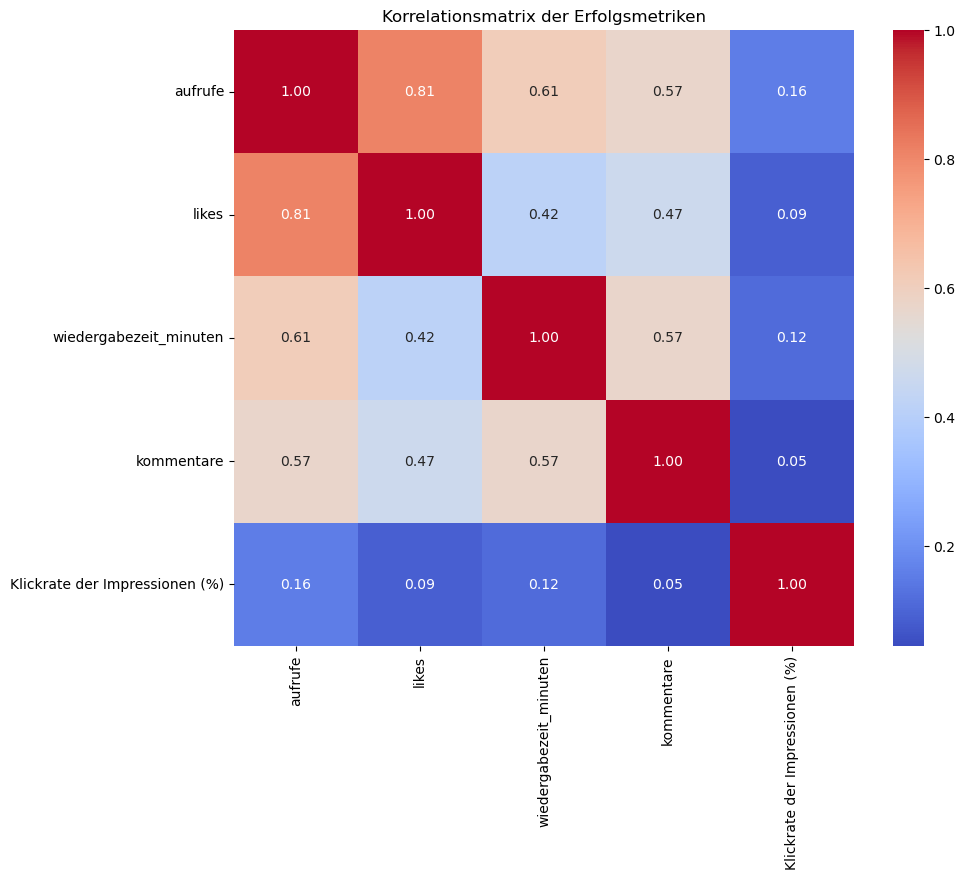

In [6]:

# Korrelationen berechnen
correlation_matrix = data[['aufrufe', 'likes', 'wiedergabezeit_minuten', 'kommentare', 'Klickrate der Impressionen (%)']].corr()

# Visualisierung der Korrelationen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Erfolgsmetriken")
plt.show()



## Modellierung

Basierend auf den Daten wird ein Modell entwickelt, um die Aufrufe eines Videos vorherzusagen. 
?? Dazu wird ein einfacher Ansatz wie ein Random-Forest-Regressor verwendet. Hier bin ich noch nicht weitergekommen. Hänge durch die umfangreichen Datenaufbereitungsvorgänge hinterher


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Daten vorbereiten
features = data[['video_length_seconds', 'Bewertung_Titel', 'Klickrate der Impressionen (%)']]
features = features.fillna(0)  # Fehlende Werte durch 0 ersetzen
target = data['aufrufe']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Modell trainieren
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)


MSE: 11726297024.62545
R²: -0.1111794995432629



## Fazit

Zusammenfassung der wichtigsten Erkenntnisse:
- **Erfolgreiche Themen**: Themen wie "Krieg" und "Politik" zeigen hohe Engagement-Werte.
- **Korrelationen**: Faktoren wie SEO-Bewertung und Videolänge korrelieren stark mit der Performance.
- **Modellleistung**: Das entwickelte Modell liefert eine Vorhersage der Aufrufe mit akzeptabler Genauigkeit.

Empfehlungen:
1. Titel mit SEO-Bewertung optimieren, um Engagement zu steigern.
2. Fokus auf erfolgreiche Themen legen.
3. Modell weiter verfeinern, um Genauigkeit zu verbessern.
